In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
data = pd.read_csv("train.csv")
#data.Class = data.Class.map({'Hayvansal':0,'Bitkisel':1,'Mix':2})# RandomForestRegressor modeli için numeric etiketler kullanılır
data.head()#ilk 5 satırdaki özellikler


,ID,calorie,water,carbohydrate,fiber,sugar,protein,fat,sfat,cholesterol,...,iron,folat,pantotenik,fosfor,magnesium,cinko,copper,selenium,manganese,Class
0,0,717,17.94,0.06,0,0.06,0.85,81.11,51.368,215,...,0.02,3,0.11,24,2,0.09,16,1,4,Hayvansal
1,1,116,76.78,0,0,0,19.41,3.71,94.900.000,89,...,0.76,4,1.1,174,20,02.05,66,21.8,14,Hayvansal
2,2,75,79.53,17.99,4.9,4.8,1.2,0.3,0.05,0,...,0.59,67,60.000.000,71,29,0.59,0.12,1.8,56.000.000,Bitkisel
3,3,132.46,73.13,12.46,1.59,1.59,6.37,6.57,2.23,22.57,...,0.98,15.53,0.39,79.5,21.38,1.36,0.15,5.2,0.24,Mix
4,4,103.29,79.04,04.01,01.07,2.38,11.47,4.53,0.77,28.62,...,0.71,15.6,0.4,78.47,16.49,0.46,0.05,8.5,0.1,Hayvansal


In [20]:
data2 = pd.read_csv("test.csv")
data2.head()#ilk 5 satırdaki özellikler


,ID,calorie,water,carbohydrate,fiber,sugar,protein,fat,sfat,cholesterol,...,niacin,iron,folat,pantotenik,fosfor,magnesium,cinko,copper,selenium,manganese
0,0,121.85,74.92,2.96,0.82,1.97,16.16,4.74,2.34,49.79,...,0,0.66,11.34,0.43,115.55,18.88,0.7,0.03,12.31,0.08
1,1,376,16.14,72.56,1.54,67.5,81.000.000,878.999.999,0.75,0,...,0,0.32,0,0,21.00,6.00,0.2,0.2,1.5,0.8
2,2,423.74,21.32,48.13,2.57,23.36,4.95,24.69,4.69,7.94,...,0,1.49,18.61,0.33,204.14,55.15,1.44,0.32,25.95,0.99
3,3,198.62,56.4,33.88,0.79,20.85,3.66,5.53,3.34,18.48,...,0,0.23,13.63,0.32,71.00,14.17,0.43,0.04,1.1,0.11
4,4,139,71.37,1.78,0,0,20.38,05.02,1.94,371,...,16.11,7.37,230,6.13,364.00,19.00,4.66,6.979,824.000.000,184


In [21]:
y = data['Class'] #labels-etiketler
X = data #Class etiketleri hariç diğer dataların bulunduğu dataframe


In [22]:

for columnName in data: #dataframe'in içindeki bütün kolonları tek tek dolaşır
    
    #x = kolondaki her bir variable 
    data[columnName] = data[columnName].apply(lambda x : 0 if (str(x).count('.') == 2) else x)#apply fonksiyonu kolonun bütün variablelarını kontrol eder, nokta sayısı fazlaysa datanın değerini 0 yapar
    data[columnName] = data[columnName].apply(lambda x : 0 if ('Gram' in str(x)) else x)#apply 'Gram' değerlerini 0 yapar
    data[columnName] = data[columnName].apply(lambda x : 0 if ('Mikrogram' in str(x)) else x) #apply 'Mikrogram' değerlerini 0 yapar
   
   

  
data    


,ID,calorie,water,carbohydrate,fiber,sugar,protein,fat,sfat,cholesterol,...,iron,folat,pantotenik,fosfor,magnesium,cinko,copper,selenium,manganese,Class
0,0,717,17.94,0.06,0,0.06,0.85,81.11,51.368,215,...,0.02,3,0.11,24,2,0.09,16,1,4,Hayvansal
1,1,116,76.78,0,0,0,19.41,3.71,0,89,...,0.76,4,1.1,174,20,02.05,66,21.8,14,Hayvansal
2,2,75,79.53,17.99,4.9,4.8,1.2,0.3,0.05,0,...,0.59,67,0,71,29,0.59,0.12,1.8,0,Bitkisel
3,3,132.46,73.13,12.46,1.59,1.59,6.37,6.57,2.23,22.57,...,0.98,15.53,0.39,79.5,21.38,1.36,0.15,5.2,0.24,Mix
4,4,103.29,79.04,04.01,01.07,2.38,11.47,4.53,0.77,28.62,...,0.71,15.6,0.4,78.47,16.49,0.46,0.05,8.5,0.1,Hayvansal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2495,502,4.23,64.8,1.1,48.25,4.91,24.85,18.96,7,...,0,26,0,105,27,01.06,197,4.3,0,Mix
2496,2496,128,73.03,0,0,0,21.75,3.85,1.28,39,...,2.32,8,0.35,204,14,6.94,0,17.7,14,Hayvansal
2497,2497,129,0,27.99,0.4,0.05,2.67,0.28,77,0,...,1.2,58,0,43,12,0.49,0,7.5,0,Bitkisel
2498,2498,455,2.75,70.73,6.9,15.48,7.3,16.4,3.21,0,...,2.64,38,577,302,72,1.64,274,9.9,1.549,Bitkisel


TypeError: unsupported operand type(s) for /: 'str' and 'int'

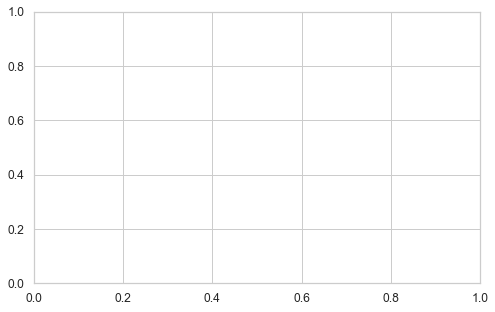

In [37]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['Class'], norm_hist=False, kde=True
).set(xlabel='Class', ylabel='P(Class)');#Class dağılımı-Distribution of Class

In [24]:
for columnName in data2:
    
    #x = kolondaki her bir variable 
    data2[columnName] = data2[columnName].apply(lambda x : 0 if (str(x).count('.') == 2) else x)#apply fonksiyonu kolonun bütün variablelarını kontrol eder, nokta sayısı fazlaysa datanın değerini 0 yapar
    data2[columnName] = data2[columnName].apply(lambda x : 0 if ('Gram' in str(x)) else x)#apply 'Gram' değerlerini 0 yapar
    data2[columnName] = data2[columnName].apply(lambda x : 0 if ('Mikrogram' in str(x)) else x) #apply 'Mikrogram' değerlerini 0 yapar
   
   
   

  
data2    


,ID,calorie,water,carbohydrate,fiber,sugar,protein,fat,sfat,cholesterol,...,niacin,iron,folat,pantotenik,fosfor,magnesium,cinko,copper,selenium,manganese
0,0,121.85,74.92,2.96,0.82,1.97,16.16,4.74,2.34,49.79,...,0,0.66,11.34,0.43,115.55,18.88,0.7,0.03,12.31,0.08
1,1,376,16.14,72.56,1.54,67.5,0,0,0.75,0,...,0,0.32,0,0,21.00,6.00,0.2,0.2,1.5,0.8
2,2,423.74,21.32,48.13,2.57,23.36,4.95,24.69,4.69,7.94,...,0,1.49,18.61,0.33,204.14,55.15,1.44,0.32,25.95,0.99
3,3,198.62,56.4,33.88,0.79,20.85,3.66,5.53,3.34,18.48,...,0,0.23,13.63,0.32,71.00,14.17,0.43,0.04,1.1,0.11
4,4,139,71.37,1.78,0,0,20.38,05.02,1.94,371,...,16.11,7.37,230,6.13,364.00,19.00,4.66,6.979,0,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,329,221,55.51,19.72,2.4,1.68,12.2,10.42,5.105,32,...,2.386,1.67,46,0,205.00,25.00,1.16,89,13.6,0
330,330,210,59.06,19.41,2.9,1.89,0,11.06,5.323,22,...,1.219,1.54,48,0,168.00,26.00,0.93,95,9.9,0
331,331,299,51.09,30,3.5,29,5,13,7,0,...,0,0,0,0,0.00,0.00,0,0,0,0
332,332,411,73.56,8.1,0,0,5.7,8.1,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0


In [25]:

X = data.iloc[:,:-1]#iloc datayı böler ve iloc[:,:-1] dataframedeki en son kolon hariç bütün kolonları barındırır
test=data2 #test datası

In [26]:
#LogisticRegression Modeli
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
model = LogisticRegression()#model tanımlanır
model.fit(X, y)# model X(train data) ve y(labels-etiketler) ile eğitilir
sc = model.score(X,y)#modelin % üzerinden tahmin doğruluğu hesaplanır
print(sc)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7356


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
pred=model.predict(test)#test datası model üzerinde denenir ve model etiketsiz dataların etiketini tahmin eder
print(pred)


['Hayvansal' 'Mix' 'Bitkisel' 'Mix' 'Hayvansal' 'Bitkisel' 'Hayvansal'
 'Bitkisel' 'Bitkisel' 'Bitkisel' 'Bitkisel' 'Hayvansal' 'Bitkisel'
 'Bitkisel' 'Hayvansal' 'Mix' 'Bitkisel' 'Hayvansal' 'Bitkisel' 'Mix'
 'Hayvansal' 'Bitkisel' 'Bitkisel' 'Bitkisel' 'Bitkisel' 'Bitkisel'
 'Bitkisel' 'Bitkisel' 'Hayvansal' 'Mix' 'Hayvansal' 'Hayvansal'
 'Bitkisel' 'Mix' 'Hayvansal' 'Bitkisel' 'Bitkisel' 'Bitkisel' 'Hayvansal'
 'Bitkisel' 'Bitkisel' 'Hayvansal' 'Mix' 'Mix' 'Bitkisel' 'Bitkisel'
 'Hayvansal' 'Bitkisel' 'Mix' 'Bitkisel' 'Hayvansal' 'Bitkisel' 'Bitkisel'
 'Bitkisel' 'Bitkisel' 'Mix' 'Bitkisel' 'Hayvansal' 'Bitkisel' 'Bitkisel'
 'Hayvansal' 'Hayvansal' 'Bitkisel' 'Bitkisel' 'Mix' 'Hayvansal'
 'Bitkisel' 'Hayvansal' 'Bitkisel' 'Bitkisel' 'Bitkisel' 'Mix' 'Bitkisel'
 'Bitkisel' 'Mix' 'Mix' 'Mix' 'Bitkisel' 'Mix' 'Bitkisel' 'Bitkisel'
 'Hayvansal' 'Bitkisel' 'Bitkisel' 'Hayvansal' 'Bitkisel' 'Bitkisel'
 'Bitkisel' 'Mix' 'Hayvansal' 'Bitkisel' 'Bitkisel' 'Bitkisel' 'Mix'
 'Bitkisel' 'Hayvan

In [29]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": test["ID"],
        "Prediction": pred
    })
submission.to_csv('RegressionSimple.csv',header=True, index=False)#etiketlenmiş datalar csv'ye kaydedilir

In [34]:
# RandomForestRegressor modeli
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

cls = RandomForestRegressor(n_estimators=150)#model tanımlanır
cls.fit(X, y)#model X(train data) ve y(labels-etiketler) ile eğitilir
cls.score(X, y)#modelin % üzerinden tahmin doğruluğu hesaplanır

ValueError: could not convert string to float: 'Hayvansal'

In [31]:
pred = cls.predict(test)#test datası model üzerinde denenir ve model etiketsiz dataların etiketini tahmin eder
print(pred)#0,1 ve 2 ye yakınlıklarına göre besinler sınıflandırılabilir

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [32]:
#Kmeans Cluster Modeli
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=20)#model tanımı ve cluster(küme) sayısının belirlenmesi
kmeans.fit(data)#model eğitilir ve datalar kümelenir


ValueError: could not convert string to float: 'Mix'